##Task 6: House Price Prediction
###Objective:
 Predict house prices using property features such as size, bedrooms, and location.
###Dataset:
 House Price Prediction Dataset (available on Kaggle)
###Instructions:
● Perform preprocessing on features like square footage, number of bedrooms, and
location.
● Train a regression model (Linear Regression or Gradient Boosting).
● Visualize predicted prices compared to actual prices.
● Evaluate with Mean Absolute Error (MAE) and RMSE.
###Skills:
● Regression modeling
● Feature scaling and selection
● Model evaluation (MAE, RMSE)
● Real estate data understanding

## Load Dataset

Load the 'House Price Prediction Dataset' into a pandas DataFrame from the path provided by Kagglehub, ensuring it's accessible for analysis.


In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zafarali27/house-price-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 28.7k/28.7k [00:00<00:00, 27.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/zafarali27/house-price-prediction-dataset/versions/1


In [13]:
import os
import pandas as pd

# List contents of the downloaded directory to find the correct CSV file
print(f"Contents of the downloaded directory '{path}':")
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):
            actual_csv_filename = file
            print(f"Found CSV file: {actual_csv_filename}")
            break
    if actual_csv_filename: # Break outer loop if found
        break

if 'actual_csv_filename' in locals():
    # Construct the full path to the dataset CSV file using the identified name
    dataset_file_path = os.path.join(path, actual_csv_filename)

    # Load the dataset into a pandas DataFrame
    df = pd.read_csv(dataset_file_path)
    print("Dataset loaded successfully.")

    # Display the first 5 rows of the DataFrame
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

    # Print the column names and their data types
    print("\nDataFrame Info:")
    df.info()
else:
    print("Error: No CSV file found in the downloaded directory.")

Contents of the downloaded directory '/root/.cache/kagglehub/datasets/zafarali27/house-price-prediction-dataset/versions/1':
Found CSV file: House Price Prediction Dataset.csv
Dataset loaded successfully.

First 5 rows of the DataFrame:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     -------------

## Data Preprocessing

Perform preprocessing steps on the features, including handling missing values, encoding categorical features like 'Location', and scaling numerical features such as 'square footage' and 'number of bedrooms'.


In [14]:
print("Missing values before preprocessing:")
print(df.isnull().sum())

Missing values before preprocessing:
Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical features
categorical_features = ['Location', 'Condition', 'Garage']
numerical_features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt'] # Exclude 'Id' and 'Price' (target)

# Create a column transformer for preprocessing steps
# One-hot encode categorical features
# Scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (like 'Id' and 'Price')
)

# Apply preprocessing
# First, separate features (X) and target (y)
X = df.drop(columns=['Price', 'Id'])
y = df['Price']

X_processed_array = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
processed_feature_names = numerical_features + list(onehot_feature_names)

# Create a DataFrame from the processed features
df_processed = pd.DataFrame(X_processed_array, columns=processed_feature_names)

# Add the target variable back to df_processed
df_processed['Price'] = y

print("Preprocessing completed successfully.")
print("\nFirst 5 rows of the processed DataFrame (df_processed):")
print(df_processed.head())
print("\nProcessed DataFrame Info:")
df_processed.info()

Preprocessing completed successfully.

First 5 rows of the processed DataFrame (df_processed):
       Area  Bedrooms  Bathrooms    Floors  YearBuilt  Location_Downtown  \
0 -1.101471  1.401791   1.305568  1.244151   0.238155                1.0   
1  1.147485  1.401791   1.305568  1.244151  -0.095942                1.0   
2  0.622317 -0.704581  -0.498326  1.244151  -0.652770                1.0   
3 -1.405759  0.699667  -0.498326  0.008035  -1.655061                0.0   
4  1.652574 -1.406705   1.305568  0.008035   0.377363                1.0   

   Location_Rural  Location_Suburban  Location_Urban  Condition_Excellent  \
0             0.0                0.0             0.0                  1.0   
1             0.0                0.0             0.0                  1.0   
2             0.0                0.0             0.0                  0.0   
3             0.0                1.0             0.0                  0.0   
4             0.0                0.0             0.0           

## Train Regression Model

Split the preprocessed data into training and testing sets. Train a regression model (e.g., Linear Regression or Gradient Boosting) on the training data to predict house prices.


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features (X) and target (y) from the  DataFrame
X = df_processed.drop(columns=['Price'])
y = df_processed['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Apply the Linear Regression model
linear_model = LinearRegression()

# Train the Linear Regression model
linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Data split into training and testing sets successfully.
X_train shape: (1600, 15)
X_test shape: (400, 15)
y_train shape: (1600,)
y_test shape: (400,)
Linear Regression model trained successfully.


## Evaluate Model Performance

Calculating Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 243241.98
Root Mean Squared Error (RMSE): 279859.73


## Visualize Predicted vs. Actual Prices



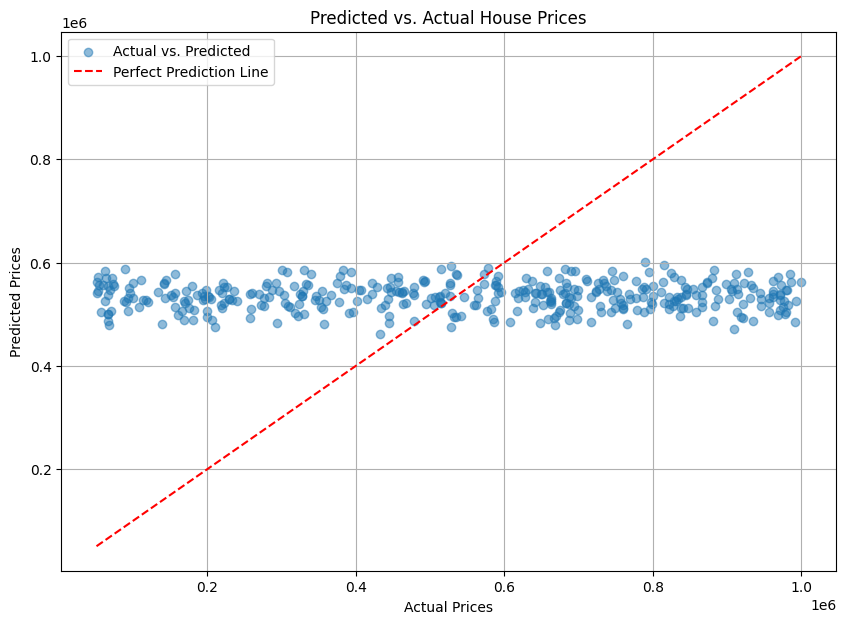

In [18]:
import matplotlib.pyplot as plt

# scatter plot of predicted vs. actual prices
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs. Predicted')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Prediction Line')

# Label axes and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual House Prices')
plt.legend()
plt.grid(True)

plt.show()

## Summary:

  The Mean Absolute Error (MAE) for the Linear Regression model is \$243,241.98, and the Root Mean Squared Error (RMSE) is \$279,859.73.

  The scatter plot of predicted versus actual prices indicates a general positive correlation, suggesting the model successfully captures the overall trend in house prices. However, the data points are scattered around the perfect prediction line, especially for higher-priced houses, which indicates that while the model captures the general direction, it still has limitations in making precise individual price predictions.

### Data Analysis Key Findings
*   The dataset, 'House Price Prediction Dataset.csv', was successfully loaded and found to contain 2000 entries and 10 columns, with no initial missing values.
*   Data preprocessing involved one-hot encoding for categorical features ('Location', 'Condition', 'Garage') and `StandardScaler` for numerical features ('Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt').
*   The dataset was split into training (1600 samples) and testing (400 samples) sets using an 80/20 ratio.
*   A Linear Regression model was trained on the preprocessed training data.
*   The model achieved a Mean Absolute Error (MAE) of \$243,241.98\$ and a Root Mean Squared Error (RMSE) of \$279,859.73\$ on the test set.
*   The visualization confirmed that the model generally predicts higher prices for houses that actually have higher prices, but with noticeable variance from the ideal prediction.

